
# Deteksi Gesture

Notebook ini digunakan untuk mendeteksi gesture dari gambar yang diunggah menggunakan MediaPipe. Ada beberapa gesture yang sudah terimplementasi, yaitu:
- **Menembak** ‚Üí ditekan tombol `x`
- **Melempar Grenade** ‚Üí ditekan tombol `s`


In [ ]:

!pip install mediapipe opencv-python


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35.6/35.6 MB 17.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 55.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 294.9/294.9 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currentl

# Import Module

In [ ]:

import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display
import io
from PIL import Image
from google.colab import files


ModuleNotFoundError: No module named 'mediapipe'

# Mengunggah gambar untuk dideteksi

In [ ]:

uploaded = files.upload()
image = None

for fn in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[fn]))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    print(f"Gambar '{fn}' berhasil dimuat.")


Saving Left_Down.PNG to Left_Down.PNG
Gambar 'Left_Down.PNG' berhasil dimuat.


# Proses deteksi gesture

In [ ]:
# Inisialisasi MediaPipe
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.7)

def detect_gesture(image):
    h, w = image.shape[:2]
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Proses tangan
    hand_results = hands.process(image_rgb)
    # Proses pose (untuk deteksi kepala & jump)
    pose_results = pose.process(image_rgb)

    annotated_image = image.copy()
    action = "tidak terdeteksi"
    key = "-"

    # ========================
    # Deteksi gesture tangan
    # ========================
    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            landmarks = hand_landmarks.landmark

            # Variabel untuk deteksi gesture original
            wrist_y = landmarks[0].y * h
            index_y = landmarks[8].y * h
            middle_y = landmarks[12].y * h
            wrist_x = landmarks[0].x * w

            # Variabel untuk shooting upward gesture
            wrist_upward = landmarks[0]
            index_tip_upward = landmarks[8]
            index_mcp_upward = landmarks[5]
            middle_tip_upward = landmarks[12]
            ring_tip_upward = landmarks[16]
            pinky_tip_upward = landmarks[20]

            wrist_y_upward = wrist_upward.y * h
            index_y_upward = index_tip_upward.y * h
            index_vector_y_upward = index_tip_upward.y - index_mcp_upward.y
            middle_y_upward = middle_tip_upward.y * h
            ring_y_upward = ring_tip_upward.y * h
            pinky_y_upward = pinky_tip_upward.y * h

            # Deteksi shooting upward gesture
            hand_high_upward = wrist_y_upward < h * 0.6
            index_pointing_up_upward = index_vector_y_upward < -0.05
            fingers_bent_upward = sum([
                middle_y_upward > index_y_upward + 10,
                ring_y_upward > index_y_upward + 10,
                pinky_y_upward > index_y_upward + 10
            ]) >= 2

            if hand_high_upward and index_pointing_up_upward and fingers_bent_upward:
                action = "shoot_up"
                key = "Arrow Up, x"
                return annotated_image, action, key
            elif wrist_y < h * 0.6 and index_y < wrist_y and abs(index_y - middle_y) > 20:
                action = "shoot"
                key = "x"
            elif wrist_x > w * 0.7 and wrist_y < h * 0.5:
                action = "grenade"
                key = "s"

    # ========================
    # Deteksi kepala dan jump
    # ========================
    if pose_results.pose_landmarks:
        mp_drawing.draw_landmarks(annotated_image, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        landmarks = pose_results.pose_landmarks.landmark

        nose = landmarks[mp_pose.PoseLandmark.NOSE]
        left_ear = landmarks[mp_pose.PoseLandmark.LEFT_EAR]
        right_ear = landmarks[mp_pose.PoseLandmark.RIGHT_EAR]
        left_eye = landmarks[mp_pose.PoseLandmark.LEFT_EYE_INNER]
        right_eye = landmarks[mp_pose.PoseLandmark.RIGHT_EYE_INNER]

        nose_x = nose.x * w
        nose_y = nose.y * h
        left_ear_x = left_ear.x * w
        right_ear_x = right_ear.x * w

        left_ear_y = left_ear.y * h
        right_ear_y = right_ear.y * h

        right_eye_y = right_eye.y * h
        left_eye_y = left_eye.y * h

        # Tambahan deteksi gesture jump
        left_wrist_y = landmarks[mp_pose.PoseLandmark.LEFT_WRIST].y * h
        right_wrist_y = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].y * h
        shoulder_y = (
            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y +
            landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y
        ) / 2 * h

        if left_wrist_y < shoulder_y and right_wrist_y < shoulder_y:
            action = "jump"
            key = "z"

        else:
          dist_left = abs(nose_x - left_ear_x)
          dist_right = abs(nose_x - right_ear_x)
          eye_avg_y = (left_eye_y + right_eye_y) / 2
          ear_avg_y = (left_ear_y + right_ear_y) / 2

          if dist_right < dist_left and eye_avg_y >= ear_avg_y:
              action = "turning_right_down"
              key = "Arrow Right, Arrow Down"
          elif dist_left < dist_right and eye_avg_y >= ear_avg_y:
              action = "turning_left_down"
              key = "Arrow Left, Arrow Down"
          elif dist_right < dist_left:
              action = "turning_right"
              key = "Arrow Right"
          elif dist_left < dist_right:
              action = "turning_left"
              key = "Arrow Left"
          elif nose_y > ear_avg_y + 20:
              action = "head_down"
              key = "Arrow Down"

    return annotated_image, action, key

Gesture terdeteksi: turning_left_down, tombol yang ditekan adalah: Arrow Left, Arrow Down


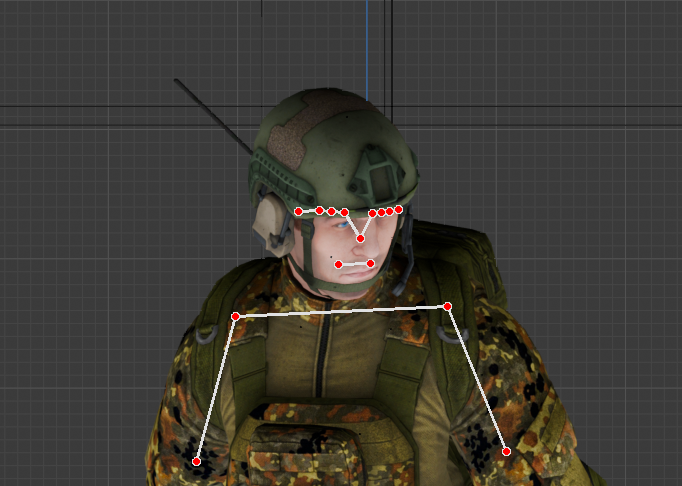

In [ ]:
if image is not None:
    annotated, gesture, key = detect_gesture(image)
    print(f"Gesture terdeteksi: {gesture}, tombol yang ditekan adalah: {key}")
    cv2_imshow(annotated)

| Gesture           | Tombol                  | Penjelasan                                                     |
| ----------------- | ----------------------- | -------------------------------------------------------------- |
| ü§ö Idle           | `None`                  | Diam, tidak ada aksi                                           |
| ‚úã Jalan / Maju    | `Arrow Right`           | Angkat tangan kiri lurus ke depan                              |
| ü´≤ Arah Maju      | `-` (DPAD/Arrow) | Gerakan kepala ke kanan digunakan saat ingin maju              |
| üî´ Shoot          | `x`                     | Tangan kanan mengarah ke depan seperti memegang pistol         |
| üí£ Grenade        | `s`                     | Gerakan melempar dari belakang ke depan dengan tangan kanan                      |
| üî´‚¨ÜÔ∏è Shoot Upward | `Arrow Up + x`          | Tangan mengarah ke atas sambil posisi pistol                   |
| üîΩ Crouch         | `Arrow Down`            | Kepala menunduk hingga hidung lebih rendah dari posisi telinga |
| ü¶ò Jump           | `z`                     | Lompat hingga posisi pundak keluar dari frame                            |
